___
# Part1 : setup
___

Imports libraries

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np


Gets data

In [ ]:
df = pd.read_csv("output_files/meta_beta_values.csv")

In [ ]:
df.isna().sum()

ID_REF        0
GSM4409578    0
GSM4409579    0
GSM4409580    0
GSM4409581    0
             ..
GSM4409649    0
GSM4409650    0
GSM4409651    0
GSM4409652    0
GSM4409653    0
Length: 76, dtype: int64

___
## 1. Preprocessing: filters data first for confounding attributes and then filters based on variance
___

In [ ]:
pca = PCA() #need number of components?

# transposition
Tbeta_df = df[1:].T
pca.fit(Tbeta_df)

# loadings 
loadings = pd.DataFrame(
    np.abs(pca.components_.T),
    index=beta_values.index,
    columns=[] # needs pc's 
)

# sum contributions across top PCs, or just use PC1
loadings['combined'] = loadings[[]].sum(axis=1) # needs pcs

# get top contributing CpGs
top_cpgs = loadings['combined'].sort_values(ascending=False).head(10000)
subset_beta = df.loc[top_cpgs.index]

___
# Sandboxing
___

filtering CpG sites

In [ ]:
# df_measures = df.iloc[:,1:len(df.columns)]

# means = []

# for row in df_measures.itertuples():

#     ave = sum(row)/len(row)
#     means.append(ave)

# min(means)
# # df_measures['beta_mean'] = 

0.20603791402868246

In [ ]:
# row_variances = df_measures.var(axis=1)

NameError: name 'df_measures' is not defined

In [ ]:

# min(row_variances)

1.735985020136081e-05

In [ ]:
# beta_matrix = df.iloc[:,1:len(df.columns)].to_numpy()
# km = KMeans(n_clusters = 100, random_state = 0, n_init="auto")


In [ ]:
# np.isnan(beta_matrix).sum()

np.int64(0)

___
 #### next 2 sandbox cells: these gets a single cluster
___

creates df of a single cluster

In [9]:
# run once to get set of labels 
labels = km.fit_predict(beta_matrix)
labels
df['labels'] = labels
df.head()


,ID_REF,GSM4409578,GSM4409579,GSM4409580,GSM4409581,GSM4409582,GSM4409583,GSM4409584,GSM4409585,GSM4409586,...,GSM4409645,GSM4409646,GSM4409647,GSM4409648,GSM4409649,GSM4409650,GSM4409651,GSM4409652,GSM4409653,labels
0,cg00000029,0.651094,0.650451,0.634303,0.620983,0.599298,0.566119,0.675059,0.600194,0.615174,...,0.615825,0.627343,0.660676,0.654224,0.640789,0.613980,0.643257,0.631593,0.646609,92
1,cg00000108,0.960434,0.954877,0.957124,0.948438,0.950022,0.949574,0.950393,0.950260,0.947326,...,0.958739,0.953261,0.952710,0.951573,0.958350,0.955655,0.951422,0.955816,0.950133,65
2,cg00000109,0.899284,0.835354,0.886725,0.872381,0.872987,0.867569,0.892893,0.867972,0.861312,...,0.896487,0.880993,0.889053,0.865207,0.893211,0.884844,0.886243,0.885892,0.884258,1
3,cg00000165,0.162039,0.155513,0.145876,0.172293,0.188915,0.154112,0.151555,0.168012,0.143774,...,0.151252,0.158671,0.188231,0.191992,0.163816,0.184146,0.153689,0.160870,0.194933,4
4,cg00000236,0.859468,0.842830,0.846900,0.841603,0.841441,0.830110,0.847721,0.835056,0.833633,...,0.859449,0.846702,0.846130,0.853704,0.863567,0.834595,0.854181,0.863500,0.847537,51


In [10]:
# run for each cluster id number
cluster_df = df[df['labels'] == 3] # if looping; make this general

len(cluster_df)

295

In [ ]:
# labels = KMeans(n_clusters = 15, random_state = 0, n_init="auto").fit_predict(beta_matrix)

# nested_dict = {
#     'labels': labels,
#     'distortion': distortion
#     }

# candidates_dict[15] = nested_dict
# candidates_dict

___
# Part 3: CpG modules
___

In [49]:
lin = np.arange(1, 11)
xp = 2**np.arange(4,10).astype(int)

print(lin)
print(xp)

k_candidates = np.concatenate([lin, xp])
print(k_candidates)

candidates_dict = {}

for k in k_candidates:
    model = KMeans(n_clusters = k, random_state = 0, n_init="auto")
    labels = model.fit_predict(beta_matrix)
    distortion = model.inertia_
    
    nested_dict = {
    'labels': labels,
    'distortion': distortion
    }

    candidates_dict[k] = nested_dict

[ 1  2  3  4  5  6  7  8  9 10]
[ 16  32  64 128 256 512]
[  1   2   3   4   5   6   7   8   9  10  16  32  64 128 256 512]


In [50]:
candidates_dict

{np.int64(1): {'labels': array([0, 0, 0, ..., 0, 0, 0], shape=(485512,), dtype=int32),
  'distortion': 5377201.921572283},
 np.int64(2): {'labels': array([1, 1, 1, ..., 0, 0, 0], shape=(485512,), dtype=int32),
  'distortion': 511588.59914099344},
 np.int64(3): {'labels': array([2, 1, 1, ..., 0, 0, 0], shape=(485512,), dtype=int32),
  'distortion': 230650.53625823342},
 np.int64(4): {'labels': array([2, 1, 1, ..., 0, 0, 0], shape=(485512,), dtype=int32),
  'distortion': 135524.27331523778},
 np.int64(5): {'labels': array([3, 1, 1, ..., 0, 0, 0], shape=(485512,), dtype=int32),
  'distortion': 92963.46958041575},
 np.int64(6): {'labels': array([2, 1, 1, ..., 0, 0, 0], shape=(485512,), dtype=int32),
  'distortion': 70331.77598189516},
 np.int64(7): {'labels': array([2, 6, 1, ..., 0, 0, 0], shape=(485512,), dtype=int32),
  'distortion': 56348.43439611523},
 np.int64(8): {'labels': array([3, 6, 1, ..., 0, 0, 0], shape=(485512,), dtype=int32),
  'distortion': 47343.1768732036},
 np.int64(9): 

In [51]:
values = []
target_key = "distortion"

for inner_dict in candidates_dict.values():  # Assuming the top level is a dict of dicts
    
    if isinstance(inner_dict, dict) and target_key in inner_dict:
        values.append(inner_dict[target_key])

values

[5377201.921572283,
 511588.59914099344,
 230650.53625823342,
 135524.27331523778,
 92963.46958041575,
 70331.77598189516,
 56348.43439611523,
 47343.1768732036,
 41158.530765974654,
 36517.45095675447,
 24032.282972247544,
 15951.060401498464,
 11945.870362397993,
 9526.370182826147,
 7966.947140521868,
 6974.506722751813]

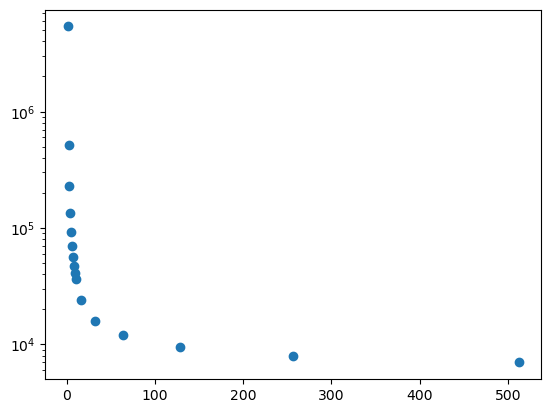

In [53]:
x = k_candidates
y = values
plt.scatter(x, y)
plt.yscale('log')